In [1]:
import sys
sys.path.append('D:\\Git\\machine-learning')

# Test

(-1.1, 1.5)

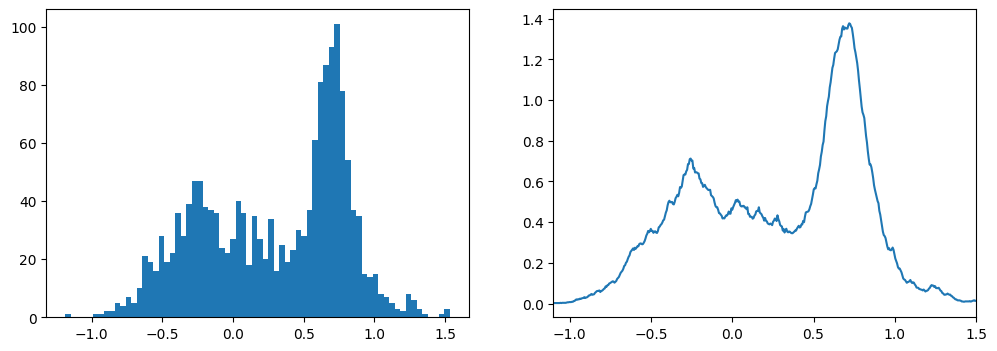

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mltools.distribution import NormalDistribution
from mltools.generative import EstimatePDF

# Create random real-world distribution
x1 = np.random.rand(500)
x2 = np.random.normal(0.7, 0.09, 430)
x3 = np.random.normal(-0.27, 0.25, 620)
x4 = np.random.normal(1,0.25,100)

x = np.concatenate([x1,x2,x3,x4])

pdf_x, pdf_y = EstimatePDF().smooth_pdf(x, 500)

fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].hist(x,bins=70);
ax[1].plot(pdf_x, pdf_y)
ax[1].set_xlim(-1.1,1.5)

Plotting normal distribution along the PDF estimate

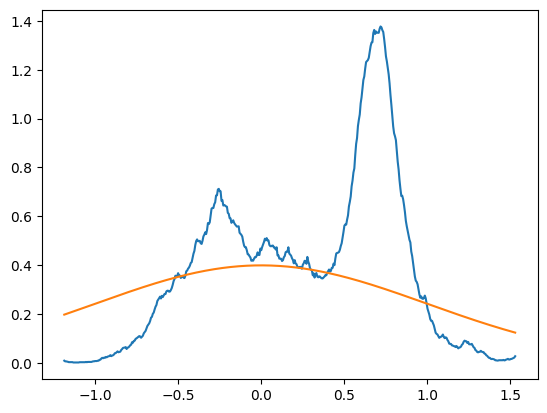

In [3]:
axis = np.linspace(-4, 2, 500)
pdf_norm = NormalDistribution(0, 1).pdf(pdf_x)

plt.plot(pdf_x, pdf_y)
plt.plot(pdf_x, pdf_norm)

In [4]:
# Max value of pdf_x where pdf_y > pdf_norm
pdf_max = np.max(pdf_y[pdf_y > pdf_norm])

max_idx = np.where(pdf_y == pdf_max)[0][0]

multiplier = pdf_y[max_idx] / pdf_norm[max_idx]

multiplier

4.473896080839827

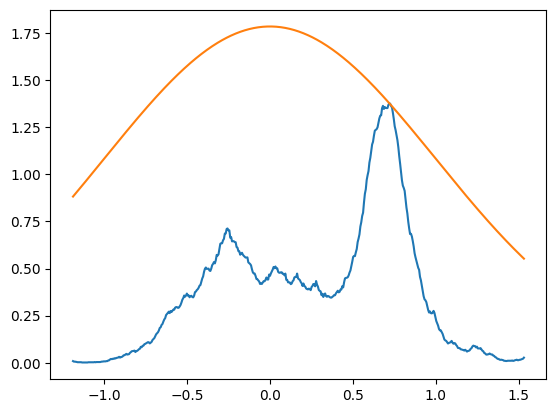

In [5]:
pdf_norm_2 = NormalDistribution(0, 2).pdf(pdf_x)

plt.plot(pdf_x, pdf_y)
plt.plot(pdf_x, pdf_norm * multiplier)

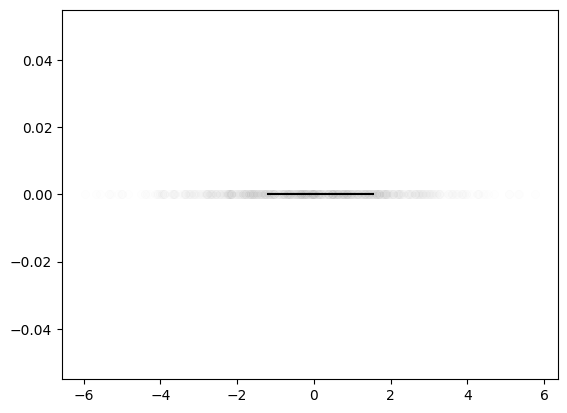

In [6]:
norm = NormalDistribution(0, 1)
samples = norm.sample(1000) * 2

plt.plot(pdf_x, np.zeros(len(pdf_x)), c='black')
plt.scatter(samples, np.zeros(1000), alpha=0.005)


(-4.0, 2.0)

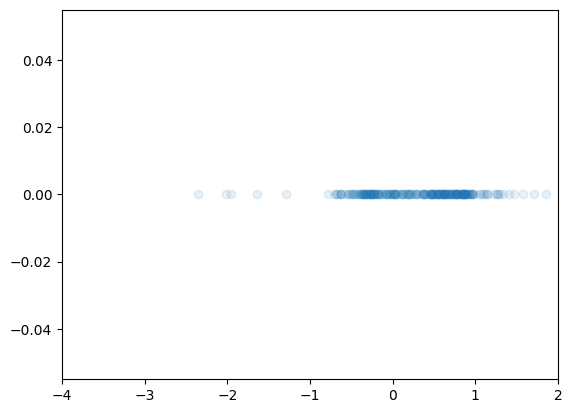

In [7]:
def find_closest(array, number):
    array = np.asarray(array)
    idx = (np.abs(array - number)).argmin()
    return idx

accepted = []
for sample in samples:
    idx = find_closest(pdf_x, sample)
    accept_proba = pdf_y[idx] / (2 * pdf_norm[idx])
    if np.random.rand() < accept_proba:
        accepted.append(sample)

plt.scatter(accepted, np.zeros(len(accepted)), alpha=0.1)
plt.xlim(-4, 2)

In [8]:
len(accepted)

274

(-1.2, 1.5)

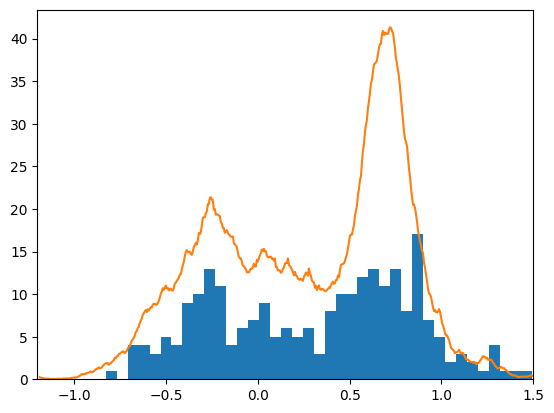

In [9]:
plt.hist(accepted, bins=150);
plt.plot(pdf_x, pdf_y*30)
plt.xlim(-1.2, 1.5)

# Result

(-1.1, 1.5)

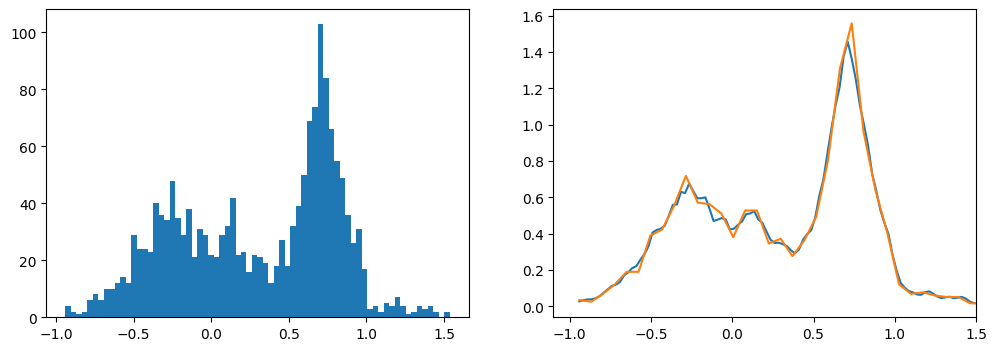

In [7]:
import sys
sys.path.append('D:\\Git\\machine-learning')

import numpy as np
import matplotlib.pyplot as plt
from mltools.distribution import NormalDistribution
from mltools.generative import EstimatePDF

# Create random real-world distribution
x1 = np.random.rand(500)
x2 = np.random.normal(0.7, 0.09, 430)
x3 = np.random.normal(-0.27, 0.25, 620)
x4 = np.random.normal(1,0.25,100)

x = np.concatenate([x1,x2,x3,x4])

pdf_x, pdf_y = EstimatePDF().smooth_pdf(x, 100)
pdf_hard_x, pdf_hard_y = EstimatePDF().pdf(x, 0.07)

fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].hist(x,bins=70);
ax[1].plot(pdf_x, pdf_y)
ax[1].plot(pdf_hard_x, pdf_hard_y)
ax[1].set_xlim(-1.1,1.5)

------------------
sample:  -0.7916670377983932
clusest_x:  -0.7902364422915027
idx:  6
M:  2.576964092194934
data_pdf_y[idx]:  0.07547938876793331
q_pdf[idx]:  0.2025441875784313
accept_proba:  0.37265640485834917
------------------
sample:  0.40951477266725234
clusest_x:  0.41053651433757676
idx:  54
M:  2.576964092194934
data_pdf_y[idx]:  0.31308833105028755
q_pdf[idx]:  1.973544726646585
accept_proba:  0.15864263263102332
------------------
sample:  0.5139629303234227
clusest_x:  0.5106009273900001
idx:  58
M:  2.576964092194934
data_pdf_y[idx]:  0.4897362078197993
q_pdf[idx]:  1.8560966702630426
accept_proba:  0.2638527484403034
------------------
sample:  -1.5061202113956984
clusest_x:  -0.9403330618701375
idx:  0
M:  2.576964092194934
data_pdf_y[idx]:  0.02783618362277228
q_pdf[idx]:  0.10305703127240594
accept_proba:  0.27010465253160815
------------------
sample:  2.3358813006602626
clusest_x:  1.5362611611773387
idx:  99
M:  2.576964092194934
data_pdf_y[idx]:  0.0191181995097

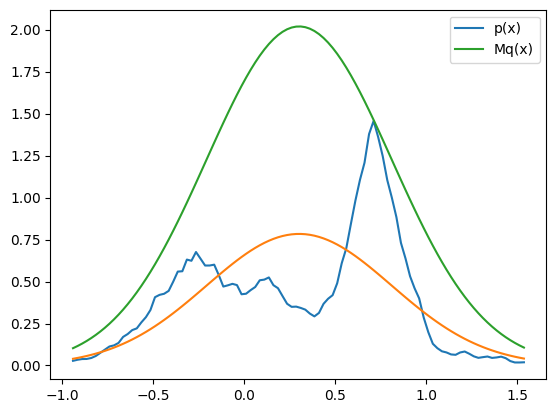

In [8]:
from mltools.generative import RejectionSampling

rs = RejectionSampling()
axis = np.linspace(-1.5, 2, 500)
samples = rs.sample(x, 1500, 100, 'normal')
# plt.hist(x, bins=100, alpha=0.5, label='Original');
# plt.hist(samples, bins=100, alpha=0.5, label='Sampled');
# plt.legend();
#plt.xlim(-1.55, 1.8)

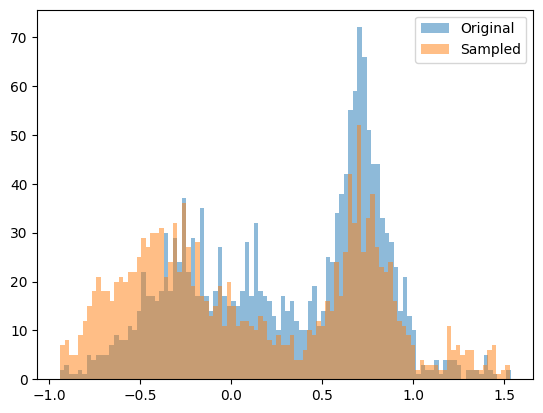

In [9]:
plt.hist(x, bins=100, alpha=0.5, label='Original');
plt.hist(samples, bins=100, alpha=0.5, label='Sampled');
plt.legend();